# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import pandas as pd
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Carregar a base de dados
tips = sns.load_dataset("tips")

# Criar a variável net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Definir a fórmula do modelo
formula = 'tip ~ sex + smoker + day + net_bill'

# Criar a matriz de design (X) e a matriz de resposta (y)
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

# Ajustar o modelo de regressão múltipla
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     20.14
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           5.30e-19
Time:                        19:11:01   Log-Likelihood:                -374.68
No. Observations:                 244   AIC:                             763.4
Df Residuals:                     237   BIC:                             787.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2017      0.258      4.652

In [3]:
# Definir a nova fórmula do modelo excluindo variáveis não significantes
formula_revised = 'tip ~ net_bill'

# Criar a nova matriz de design (X) e a matriz de resposta (y)
y_revised, X_revised = patsy.dmatrices(formula_revised, data=tips, return_type='dataframe')

# Ajustar o novo modelo de regressão múltipla
model_revised = sm.OLS(y_revised, X_revised).fit()

# Resumo do novo modelo
print(model_revised.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           5.02e-23
Time:                        19:11:01   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

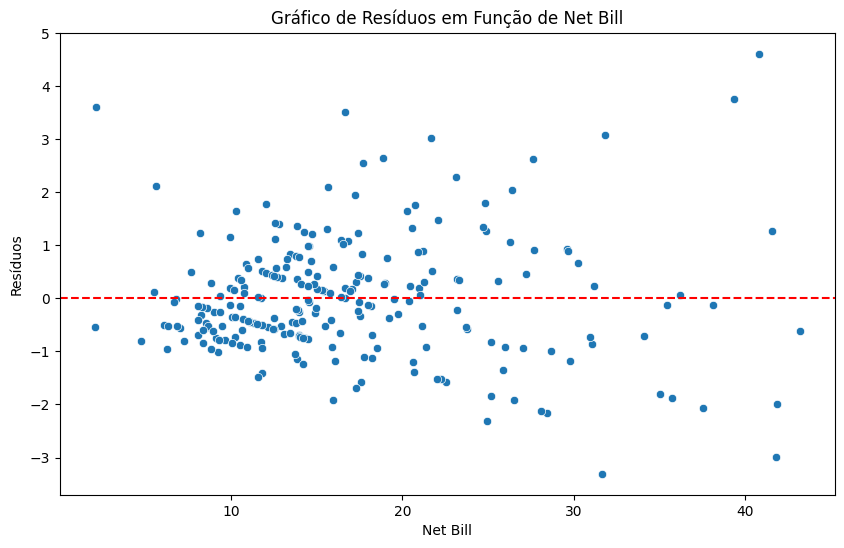

In [4]:
# Ajustar o modelo de regressão
X = sm.add_constant(tips['net_bill'])
y = tips['tip']
model = sm.OLS(y, X).fit()

# Calcular os resíduos
residuals = model.resid

# Gráfico de resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['net_bill'], y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em Função de Net Bill')
plt.show()


In [5]:

# Carregar a base de dados
tips = sns.load_dataset("tips")

# Criar a variável net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Ajustar o modelo linear
X_linear = sm.add_constant(tips['net_bill'])
y = tips['tip']
model_linear = sm.OLS(y, X_linear).fit()
print("AIC do Modelo Linear:", model_linear.aic)


AIC do Modelo Linear: 755.2579857451223


In [6]:
# Ajustar o modelo logarítmico
tips['log_net_bill'] = np.log(tips['net_bill'])
X_log = sm.add_constant(tips['log_net_bill'])
model_log = sm.OLS(y, X_log).fit()
print("AIC do Modelo Logarítmico:", model_log.aic)


AIC do Modelo Logarítmico: 768.8028337874672


In [7]:
# Ajustar o modelo polinomial de segundo grau
tips['net_bill_squared'] = tips['net_bill'] ** 2
X_poly = sm.add_constant(tips[['net_bill', 'net_bill_squared']])
model_poly = sm.OLS(y, X_poly).fit()
print("AIC do Modelo Polinomial:", model_poly.aic)


AIC do Modelo Polinomial: 756.5694343535173


In [8]:
# Carregar a base de dados
tips = sns.load_dataset("tips")

# Criar a variável net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Modelo Linear
X_linear = sm.add_constant(tips['net_bill'])
y = tips['tip']
model_linear = sm.OLS(y, X_linear).fit()
print("AIC do Modelo Linear:", model_linear.aic)

# Modelo Logarítmico
tips['log_net_bill'] = np.log(tips['net_bill'])
X_log = sm.add_constant(tips['log_net_bill'])
model_log = sm.OLS(y, X_log).fit()
print("AIC do Modelo Logarítmico:", model_log.aic)

# Modelo Polinomial
tips['net_bill_squared'] = tips['net_bill'] ** 2
X_poly = sm.add_constant(tips[['net_bill', 'net_bill_squared']])
model_poly = sm.OLS(y, X_poly).fit()
print("AIC do Modelo Polinomial:", model_poly.aic)

# Escolher o melhor modelo com base no AIC
modelos = {'Linear': model_linear.aic, 'Logarítmico': model_log.aic, 'Polinomial': model_poly.aic}
melhor_modelo = min(modelos, key=modelos.get)
print(f"O melhor modelo é o {melhor_modelo} com AIC = {modelos[melhor_modelo]}")


AIC do Modelo Linear: 755.2579857451223
AIC do Modelo Logarítmico: 768.8028337874672
AIC do Modelo Polinomial: 756.5694343535173
O melhor modelo é o Linear com AIC = 755.2579857451223


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [9]:
# Carregar a base de dados
tips = sns.load_dataset("tips")

# Criar a variável net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar a variável log_tip
tips['log_tip'] = np.log(tips['tip'])
tips.head()


,total_bill,tip,sex,smoker,day,time,size,net_bill,log_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.009950
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.506818
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,1.252763
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,1.196948
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,1.283708


In [10]:
# Definir a fórmula do modelo
formula = 'log_tip ~ sex + smoker + day + net_bill'

# Criar a matriz de design (X) e a matriz de resposta (y)
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')


In [11]:
# Mostrar as primeiras linhas da matriz de design
print(X.head())

# Mostrar as primeiras linhas da matriz de resposta
print(y.head())


   Intercept  sex[T.Female]  smoker[T.No]  day[T.Fri]  day[T.Sat]  day[T.Sun]  \
0        1.0            1.0           1.0         0.0         0.0         1.0   
1        1.0            0.0           1.0         0.0         0.0         1.0   
2        1.0            0.0           1.0         0.0         0.0         1.0   
3        1.0            0.0           1.0         0.0         0.0         1.0   
4        1.0            1.0           1.0         0.0         0.0         1.0   

   net_bill  
0     15.98  
1      8.68  
2     17.51  
3     20.37  
4     20.98  
    log_tip
0  0.009950
1  0.506818
2  1.252763
3  1.196948
4  1.283708


In [12]:
# Ajustar o modelo de regressão múltipla com log_tip como variável dependente
formula = 'log_tip ~ sex + smoker + day + net_bill'
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

# Ajustar o modelo
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     18.75
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           7.85e-18
Time:                        19:11:02   Log-Likelihood:                -95.867
No. Observations:                 244   AIC:                             205.7
Df Residuals:                     237   BIC:                             230.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4554      0.082      5.527

In [13]:
# Definir a nova fórmula do modelo excluindo variáveis não significantes
formula_revised = 'log_tip ~ smoker + net_bill'

# Criar a nova matriz de design (X) e a matriz de resposta (y)
y_revised, X_revised = patsy.dmatrices(formula_revised, data=tips, return_type='dataframe')

# Ajustar o novo modelo de regressão múltipla
model_revised = sm.OLS(y_revised, X_revised).fit()

# Resumo do novo modelo
print(model_revised.summary())


                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.31e-20
Time:                        19:11:02   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254   

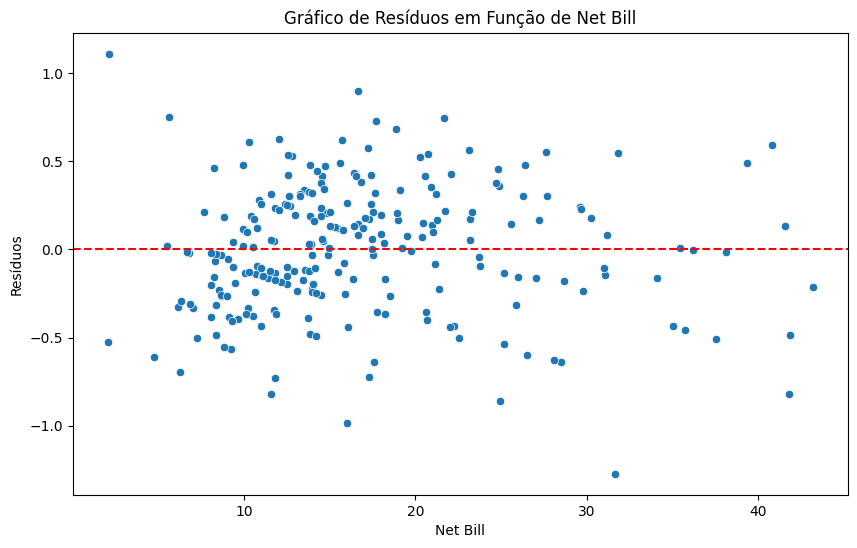

In [14]:
# Ajustar o modelo de regressão
formula_revised = 'log_tip ~ smoker + net_bill'
y_revised, X_revised = patsy.dmatrices(formula_revised, data=tips, return_type='dataframe')
model_revised = sm.OLS(y_revised, X_revised).fit()

# Calcular os resíduos
residuals = model_revised.resid

# Gráfico de resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['net_bill'], y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em Função de Net Bill')
plt.show()


In [15]:
# Carregar a base de dados
tips = sns.load_dataset("tips")

# Criar a variável net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']
# Criar a variável log_tip
tips['log_tip'] = np.log(tips['tip'])

# Modelo Linear
formula_linear = 'log_tip ~ net_bill + smoker'
y_linear, X_linear = patsy.dmatrices(formula_linear, data=tips, return_type='dataframe')
model_linear = sm.OLS(y_linear, X_linear).fit()
print("AIC do Modelo Linear:", model_linear.aic)


AIC do Modelo Linear: 200.9667715528131


In [16]:
# Modelo Logarítmico
tips['log_net_bill'] = np.log(tips['net_bill'])
formula_log = 'log_tip ~ log_net_bill + smoker'
y_log, X_log = patsy.dmatrices(formula_log, data=tips, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()
print("AIC do Modelo Logarítmico:", model_log.aic)


AIC do Modelo Logarítmico: 198.6087013711214


In [17]:
# Modelo Polinomial de segundo grau
tips['net_bill_squared'] = tips['net_bill'] ** 2
formula_poly = 'log_tip ~ net_bill + net_bill_squared + smoker'
y_poly, X_poly = patsy.dmatrices(formula_poly, data=tips, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()
print("AIC do Modelo Polinomial:", model_poly.aic)


AIC do Modelo Polinomial: 193.7271783775086


In [18]:
# Escolher o melhor modelo com base no AIC
modelos = {'Linear': model_linear.aic, 'Logarítmico': model_log.aic, 'Polinomial': model_poly.aic}
melhor_modelo = min(modelos, key=modelos.get)
print(f"O melhor modelo é o {melhor_modelo} com AIC = {modelos[melhor_modelo]}")


O melhor modelo é o Polinomial com AIC = 193.7271783775086


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [19]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


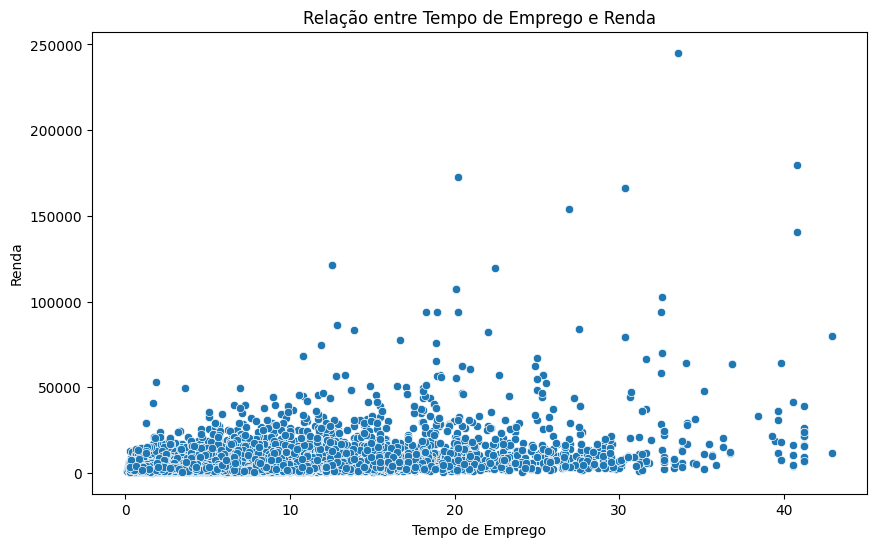

In [20]:
data = pd.DataFrame(df)

# Visualizar a relação entre as variáveis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=data)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.title('Relação entre Tempo de Emprego e Renda')
plt.show()


In [21]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['tempo_emprego', 'renda'], inplace=True)

# Preparar as variáveis explicativa e dependente
X = sm.add_constant(data['tempo_emprego'])  # Adicionar constante para a interceptação
y = data['renda']

# Ajustar o modelo
modelo = sm.OLS(y, X).fit()

# Resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:11:03   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

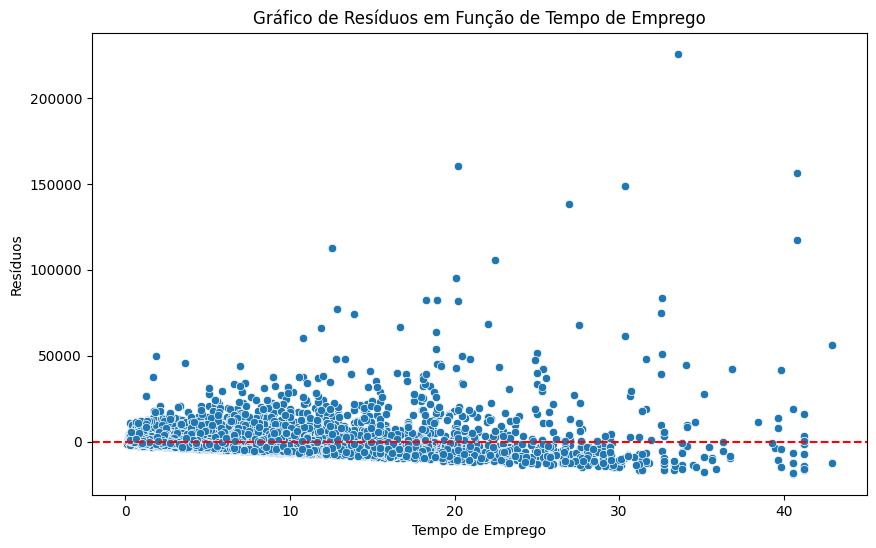

In [22]:
# Calcular os resíduos
residuos = modelo.resid

# Gráfico de resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['tempo_emprego'], y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em Função de Tempo de Emprego')
plt.show()


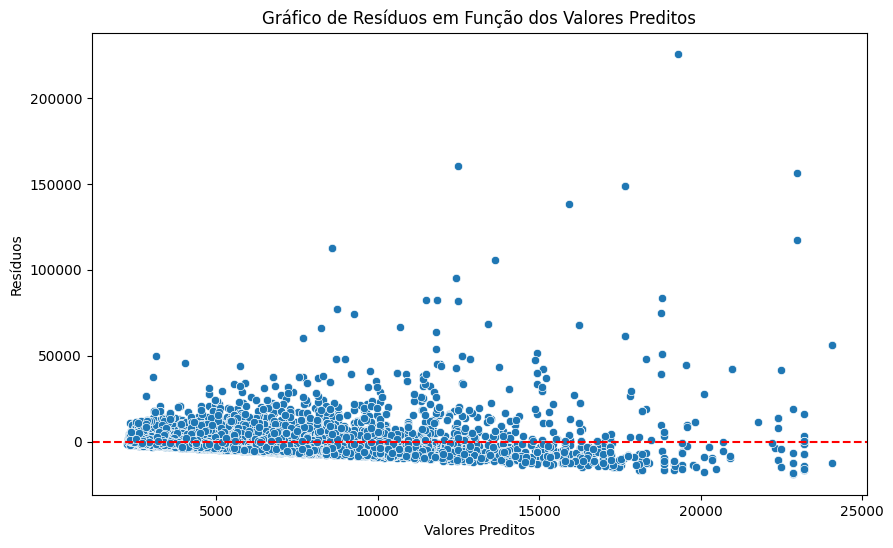

In [23]:
# Calcular os valores preditos
preditos = modelo.predict(X)

# Gráfico de resíduos vs valores preditos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=preditos, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em Função dos Valores Preditos')
plt.show()


In [24]:
# Transformação logarítmica da renda
data['log_renda'] = np.log(data['renda'])

# Ajustar o modelo com a transformação logarítmica
X_log = sm.add_constant(data['tempo_emprego'])
y_log = data['log_renda']

modelo_log = sm.OLS(y_log, X_log).fit()
print(modelo_log.summary())


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:11:04   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.8384      0.011    699.851

In [25]:
# Ajustar um modelo polinomial de segundo grau
data['tempo_emprego_squared'] = data['tempo_emprego'] ** 2

X_poly = sm.add_constant(data[['tempo_emprego', 'tempo_emprego_squared']])
modelo_poly = sm.OLS(y, X_poly).fit()
print(modelo_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1116.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:11:04   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2965.33

In [26]:
# Ajustar o modelo incluindo outras variáveis explicativas
formula_completa = 'renda ~ tempo_emprego + idade + educacao + tipo_renda'
y_completa, X_completa = patsy.dmatrices(formula_completa, data=data, return_type='dataframe')

modelo_completo = sm.OLS(y_completa, X_completa).fit()
print(modelo_completo.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     218.6
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:11:04   Log-Likelihood:            -1.2962e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12416   BIC:                         2.593e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [27]:
# Ajustar o modelo linear simples
X_linear = sm.add_constant(data['tempo_emprego'])
y = data['renda']
modelo_linear = sm.OLS(y, X_linear).fit()
print("AIC do Modelo Linear Simples:", modelo_linear.aic)


AIC do Modelo Linear Simples: 259265.15566392522


In [28]:
# Definir a fórmula do modelo
formula = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'


In [29]:
# Criar as matrizes de design (X) e a matriz de resposta (y)
y, X = patsy.dmatrices(formula, data=data, return_type='dataframe')

# Ajustar o modelo de regressão múltipla
modelo = sm.OLS(y, X).fit()

# Resumo do modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:11:04   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [30]:
# Definir a fórmula do modelo
formula = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'

# Criar as matrizes de design (X) e a matriz de resposta (y)
y, X = patsy.dmatrices(formula, data=data, return_type='dataframe')

# Ajustar o modelo de regressão múltipla
modelo = sm.OLS(y, X).fit()

# Resumo do modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:11:05   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [31]:
# Definir a fórmula do modelo inicial
formula_inicial = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'

# Criar as matrizes de design (X) e a matriz de resposta (y)
y_inicial, X_inicial = patsy.dmatrices(formula_inicial, data=data, return_type='dataframe')

# Ajustar o modelo de regressão múltipla
modelo_inicial = sm.OLS(y_inicial, X_inicial).fit()

# Resumo do modelo inicial
print(modelo_inicial.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:11:05   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [32]:
# Definir a fórmula do modelo ajustado
formula_ajustada = 'renda ~ posse_de_imovel + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'

# Criar as matrizes de design (X) e a matriz de resposta (y)
y_ajustada, X_ajustada = patsy.dmatrices(formula_ajustada, data=data, return_type='dataframe')

# Ajustar o modelo de regressão múltipla
modelo_ajustado = sm.OLS(y_ajustada, X_ajustada).fit()

# Resumo do modelo ajustado
print(modelo_ajustado.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     108.7
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:11:05   Log-Likelihood:            -1.2958e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12405   BIC:                         2.594e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

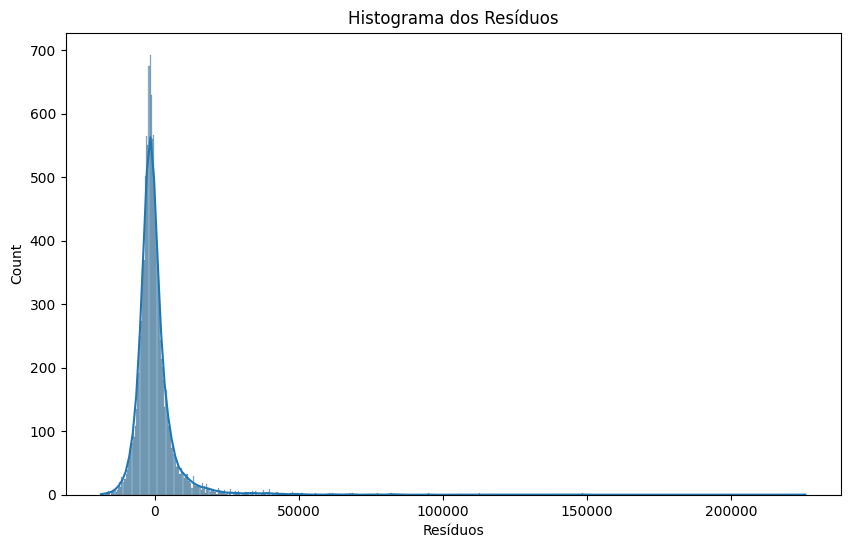

In [33]:
# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()



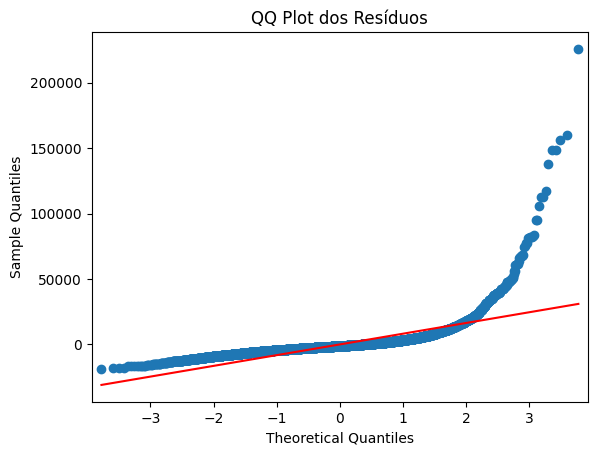

In [34]:
import statsmodels.api as sm

# QQ Plot dos resíduos
sm.qqplot(residuos, line='s')
plt.title('QQ Plot dos Resíduos')
plt.show()


Houve uma maelhora após os ajustes, contudo há uma certa dificuldade em torná-lo mais explicativo.